In [1]:
!wget https://www.dropbox.com/s/5pdslefas0iabqd/TL_Task.zip

--2023-06-09 21:31:24--  https://www.dropbox.com/s/5pdslefas0iabqd/TL_Task.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/5pdslefas0iabqd/TL_Task.zip [following]
--2023-06-09 21:31:24--  https://www.dropbox.com/s/raw/5pdslefas0iabqd/TL_Task.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3d1e3d9d2031b151d91b23ae0b.dl.dropboxusercontent.com/cd/0/inline/B9prw2SMZDSFPj4GzJjF-p11fx0q0OnMlYSfDSph3iJZJsBmg5CnkP3bfT6bdLGo_1uSckWysTe3gT2TEGBwdpSZ1IpS2VtRgwnxsbUO14QTXuLkY3EqMIEVAdbNouSBsP7JNBHQtfcmlOD9HqMVDdlHepFYY9ZuAbKcPHTCdC094Q/file# [following]
--2023-06-09 21:31:25--  https://uc3d1e3d9d2031b151d91b23ae0b.dl.dropboxusercontent.com/cd/0/inline/B9prw2SMZDSFPj4GzJjF-p11fx0q0OnMlYSfDSph3iJZJsBmg5CnkP3bfT6bdLGo_1uSckWysTe3gT2TEGB

In [2]:
!unzip TL_Task

Archive:  TL_Task.zip
replace TL_Task/Images/Train/1/10007.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [3]:
%cd TL_Task

/content/TL_Task


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [5]:
train_data = keras.utils.image_dataset_from_directory('Images/Train',batch_size=32,color_mode='grayscale',image_size=(70,70))
train_data = train_data.map(lambda x, y: (x/255,y))

test_data = keras.utils.image_dataset_from_directory('Images/Test',batch_size=200,color_mode='grayscale',image_size=(70,70))
test_data = test_data.map(lambda x, y: (x/255,y))

train_size = int(0.8*len(train_data))
test_size = int(len(test_data))
val_size = int(0.2*len(train_data))

train_data = train_data.take(train_size)
val_data = train_data.take(val_size)
test_data = test_data.take(test_size)

Found 50756 files belonging to 6 classes.
Found 12689 files belonging to 6 classes.


In [6]:
model = Sequential()
model.add(Conv2D(96, (3,3), activation = 'relu', input_shape=(70,70,1)))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(96, (3,3), activation = 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation=tf.keras.activations.softmax))

In [7]:
model.compile('adam',loss=tf.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 68, 68, 96)        960       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 34, 34, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        55360     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 96)         0

In [8]:
log = 'logs'
call = tf.keras.callbacks.TensorBoard(log_dir=log)

from keras.callbacks import Callback
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='.',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

graph_data = model.fit(train_data,epochs=30,validation_data=val_data, callbacks=[model_checkpoint_callback])

Epoch 1/30
1269/1269 [==============================] - 27s 18ms/step - loss: 0.7910 - accuracy: 0.6963 - val_loss: 0.4829 - val_accuracy: 0.8231
Epoch 2/30
1269/1269 [==============================] - 20s 16ms/step - loss: 0.5011 - accuracy: 0.8169 - val_loss: 0.3764 - val_accuracy: 0.8620
Epoch 3/30
1269/1269 [==============================] - 17s 14ms/step - loss: 0.4226 - accuracy: 0.8464 - val_loss: 0.3334 - val_accuracy: 0.8813
Epoch 4/30
1269/1269 [==============================] - 17s 14ms/step - loss: 0.3654 - accuracy: 0.8651 - val_loss: 0.2963 - val_accuracy: 0.8880
Epoch 5/30
1269/1269 [==============================] - 18s 14ms/step - loss: 0.3259 - accuracy: 0.8789 - val_loss: 0.2502 - val_accuracy: 0.9097
Epoch 6/30
1269/1269 [==============================] - 18s 14ms/step - loss: 0.2943 - accuracy: 0.8932 - val_loss: 0.2184 - val_accuracy: 0.9173
Epoch 7/30
1269/1269 [==============================] - 20s 16ms/step - loss: 0.2692 - accuracy: 0.9000 - val_loss: 0.2289 -

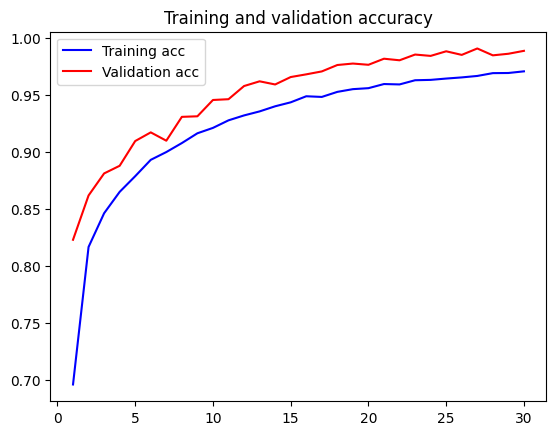

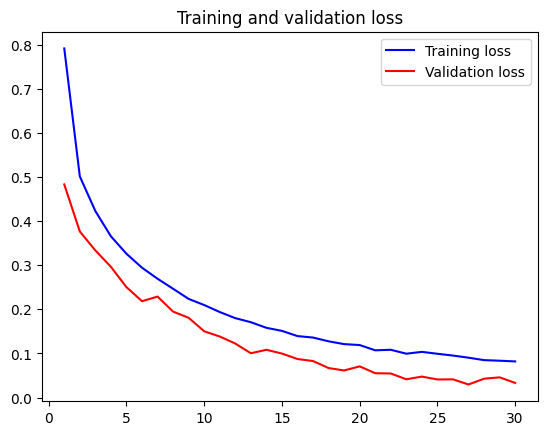

In [9]:
import matplotlib.pyplot as plt


acc = graph_data.history['accuracy']
val_acc = graph_data.history['val_accuracy']
loss = graph_data.history['loss']
val_loss = graph_data.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [10]:
test_results = model.evaluate(test_data, verbose=0,return_dict=True)

print(f" Accuracy: {test_results}")

 Accuracy: {'loss': 0.40884387493133545, 'accuracy': 0.9206399321556091}


In [12]:
from keras.metrics import Precision,Recall

prec = Precision()
rec = Recall()
for x,y in test_data.as_numpy_iterator():
  pred = np.argmax(model.predict(x),axis=1)
  prec.update_state(y,pred)
  rec.update_state(y,pred)

prec = prec.result().numpy()
rec = rec.result().numpy()
f1 = 2*prec*rec/(prec+rec)
print(f'Precision: {prec}\nRecall: {rec}\nF1: {f1}')

3/3 [==============================] - 0s 70ms/step
Precision: 0.9801133275032043
Recall: 0.9654892683029175
F1: 0.9727463074676167


In [13]:
model.save('This.h5')